# Matplotlib and Seaborn Chestsheet

- Pandas will be used to read the **csv file** and to make the **dataframe**
- Use **matplotlib** to plot various 2D graphs for the dataset
- Use **seaborn** to plot various 3D graphs for the dataset

# Matplotlib Chestsheet

## Reading the csv file using pandas library

### Extracting the `dataset` from csv file using **Pandas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Loading dataset
df = pd.read_csv("matplotlib_data.csv")
df.head()

,Category,Sales,Profit
0,D,170,89.389605
1,C,238,47.119076
2,A,292,67.484201
3,C,250,37.486964
4,C,261,51.414019


### Syntax to get 5 records from the `tail`

In [2]:
df.tail()

,Category,Sales,Profit
95,D,272,62.133311
96,D,284,74.361892
97,B,175,30.550566
98,D,230,64.308218
99,A,228,21.536147


### Syntax to get the `information` about the dataset (type, columns, datatypes)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  100 non-null    object 
 1   Sales     100 non-null    int64  
 2   Profit    100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


### Syntax to get the count, mean, std, min, max about `Categorical Data`

In [4]:
df.describe()

,Sales,Profit
count,100.00000,100.000000
mean,200.13000,50.452666
std,56.05943,20.026869
min,100.00000,2.485031
25%,155.00000,37.375706
50%,198.00000,51.181356
75%,245.50000,65.590886
max,293.00000,102.263729


## Q.1. Create a `line chart` to analyze the sales

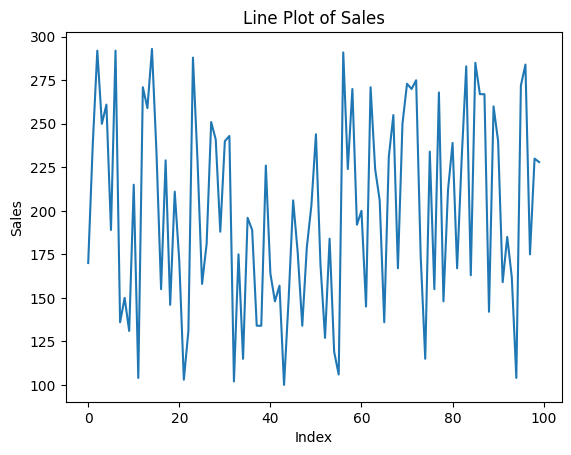

In [5]:
# Line graph example
sales = df['Sales']

sales.plot(kind='line', title='Line Plot of Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()

## Q.2. Create a Plot to compare **average sales per category**

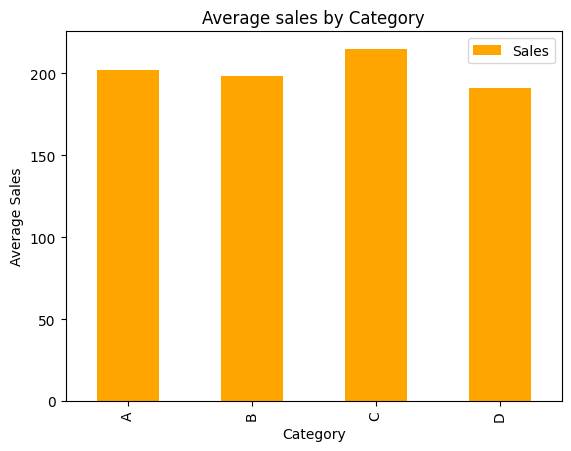

In [6]:
# Bar chart example
df.groupby('Category')['Sales'].mean().plot(
    kind='bar',color='orange',title='Average sales by Category'
)
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.legend()
plt.show()

## Q.3. Create a plot to compare the **distribution** of data `per category`

- `1.1f%` syntax is used for displaying the **percentage** of values in the bar graph
- `startangle` syntax is used to rotate the pie chart by `90 degrees`
- `plt.ylabel('')` removes the label **count** that is not required here

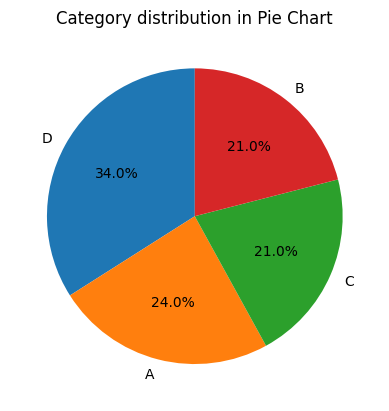

In [7]:
# Pie Chart Example
category_count = df['Category'].value_counts()
category_count.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, title='Category distribution in Pie Chart'
)
plt.ylabel('')    # Remove extra labels
plt.show()

## Q.4. Create a `Histogram` for **Profit Column**

- Increasing bins → **narrower bins** → more detailed distribution.
- Decreasing bins → **wider bins** → smoother, less detailed histogram.

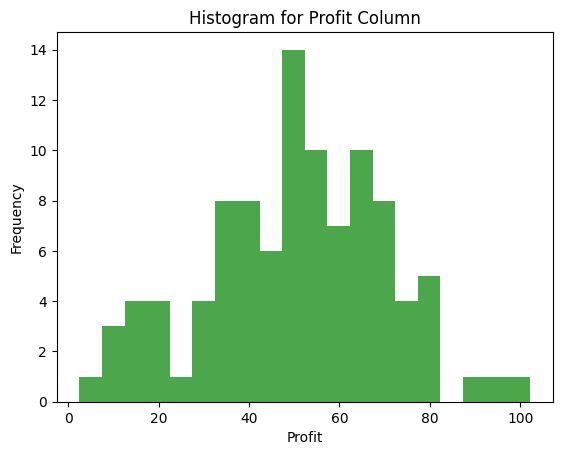

In [8]:
df['Profit'].plot(
    kind='hist', bins=20, color='green', alpha=0.7, title='Histogram for Profit Column'
)
plt.xlabel('Profit')
plt.show()

## Q.5. Create two `Subplots` side by side to find the patterns for **Sales** and **Profit** columns

- `fig` -> for the overall figure object (the whole canvas)
- `axis` -> for **array** of axes objects (indivisual plots)

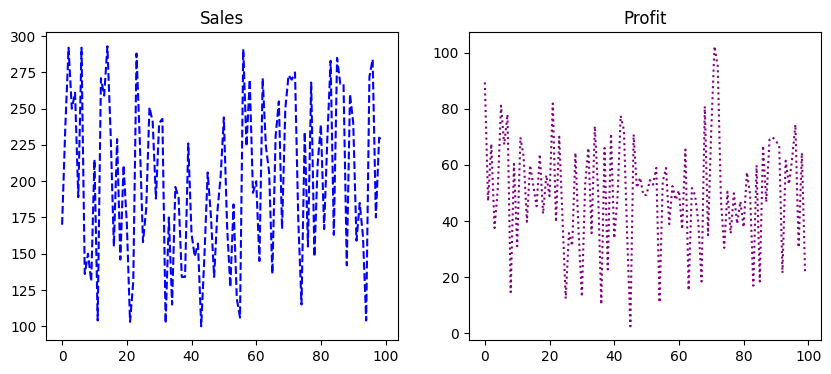

In [9]:
fig, axis = plt.subplots(1, 2, figsize = (10,4))

axis[0].plot(df['Sales'], color='blue', linestyle='--')
axis[0].set_title('Sales')

axis[1].plot(df['Profit'], color='purple', linestyle=':')
axis[1].set_title('Profit')

plt.show()

## Q.6. Create four `subplots` like 2x2 representation

- How to define the **indexes** for each `subplots`?

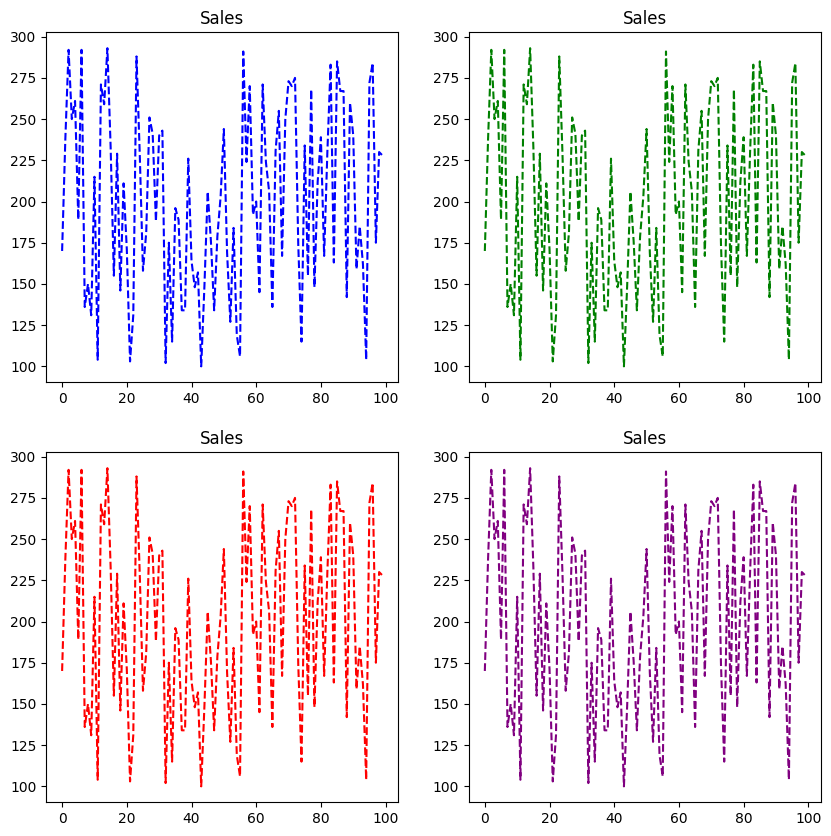

In [10]:
fig, axis = plt.subplots(2,2, figsize=(10,10))

axis[0,0].plot(df['Sales'], color='blue', linestyle='--')
axis[0,0].set_title('Sales')

axis[0,1].plot(df['Sales'], color='green', linestyle='--')
axis[0,1].set_title('Sales')

axis[1,0].plot(df['Sales'], color='red', linestyle='--')
axis[1,0].set_title('Sales')

axis[1,1].plot(df['Sales'], color='purple', linestyle='--')
axis[1,1].set_title('Sales')

plt.show()

## Q.7. Create four different `subplots` like 2x2 representation

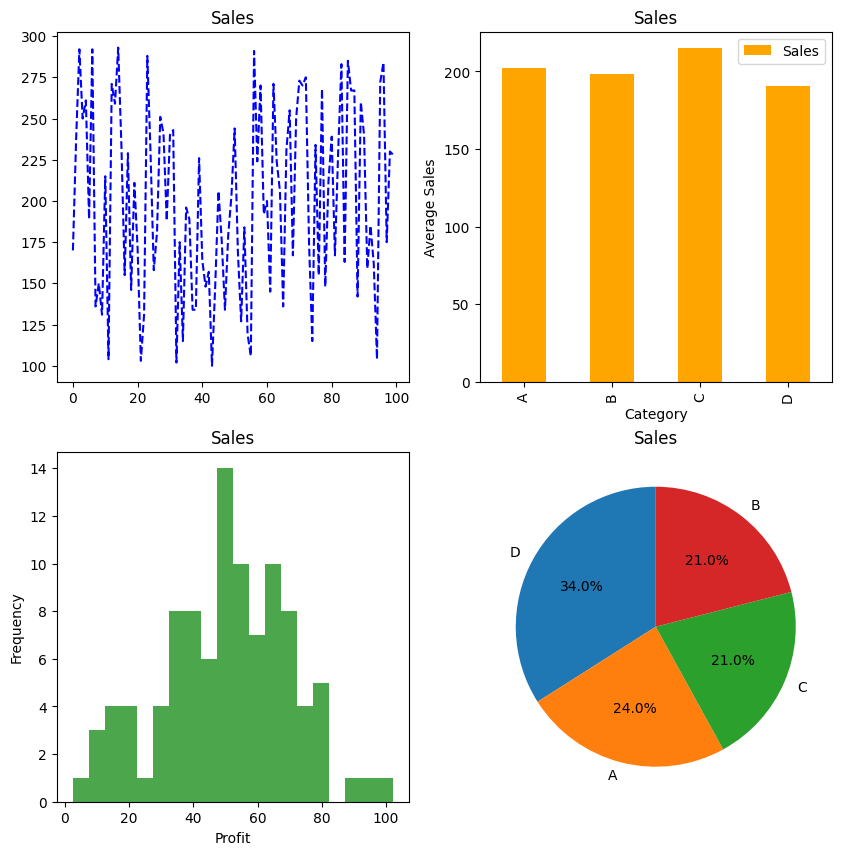

In [11]:
fig, axis = plt.subplots(2,2, figsize=(10,10))

axis[0,0].plot(df['Sales'], color='blue', linestyle='--')
axis[0,0].set_title('Sales')

df.groupby('Category')['Sales'].mean().plot(
    kind='bar', color='orange', ax = axis[0,1], title='Average sales by Category'
)
axis[0,1].set_xlabel('Category')
axis[0,1].set_ylabel('Average Sales')
axis[0,1].legend()
axis[0,1].set_title('Sales')

df['Profit'].plot(
    kind='hist', bins=20, ax=axis[1,0], color='green', alpha=0.7, title='Histogram for Profit Column'
)
axis[1,0].set_xlabel('Profit')
axis[1,0].set_title('Sales')

category_count = df['Category'].value_counts()
category_count.plot(
    kind='pie', autopct='%1.1f%%', ax=axis[1,1], startangle=90, title='Category distribution in Pie Chart'
)
axis[1,1].set_ylabel('')
axis[1,1].set_title('Sales')

plt.show()

# Seaborn Chestsheet

## Importing libraries and loading **dataset** from `.csv` file

In [12]:
# Import Libraries and Load Dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Loading dataset
df = sns.load_dataset("tips")

# Display first few rows
print("Sample Dataset (Tips):")
df.head()

Sample Dataset (Tips):


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Analyzing the dataset

In [13]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Making **scatter plot** using `seaborn` library

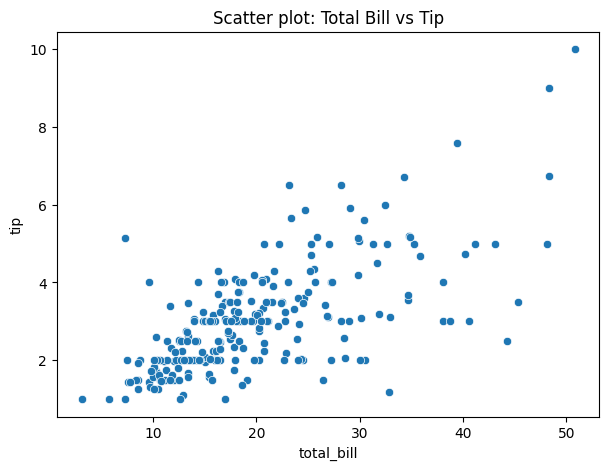

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="total_bill",y="tip")
plt.title("Scatter plot: Total Bill vs Tip")
plt.show()

### Dividing the dataset based on a category (sex) using `hue` attribute

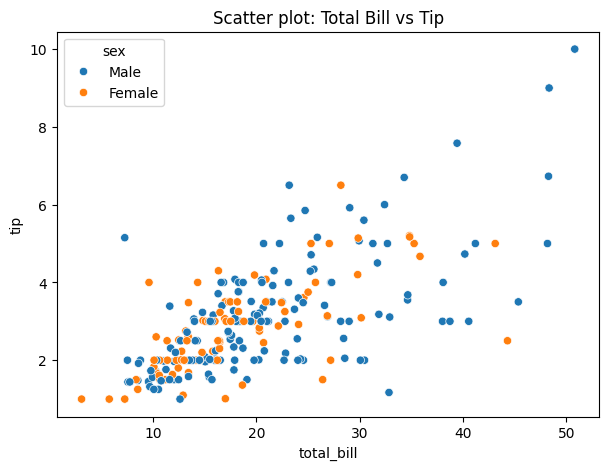

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="total_bill",y="tip",hue="sex")
plt.title("Scatter plot: Total Bill vs Tip")
plt.show()

### Dividing the dataset based on a category (smoker) using `style` attribute

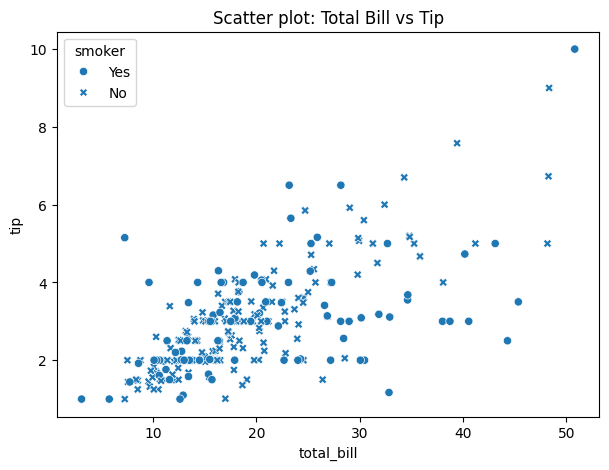

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="total_bill",y="tip",style="smoker")
plt.title("Scatter plot: Total Bill vs Tip")
plt.show()

### Dividing the dataset based on a category (smoker) using `size` attribute

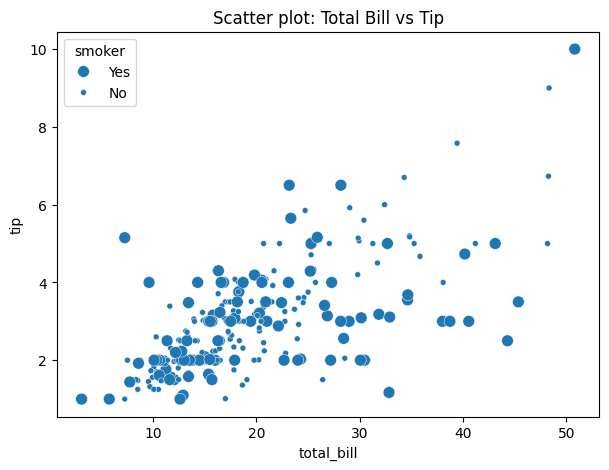

In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="total_bill",y="tip",size="smoker")
plt.title("Scatter plot: Total Bill vs Tip")
plt.show()

## Making **count plot** using `seaborn` library

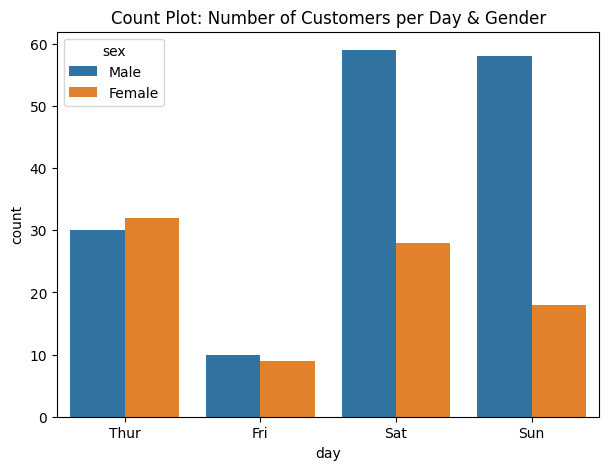

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="day", hue="sex")
plt.title("Count Plot: Number of Customers per Day & Gender")
plt.show()

### Using `hue` attribute on `time` column

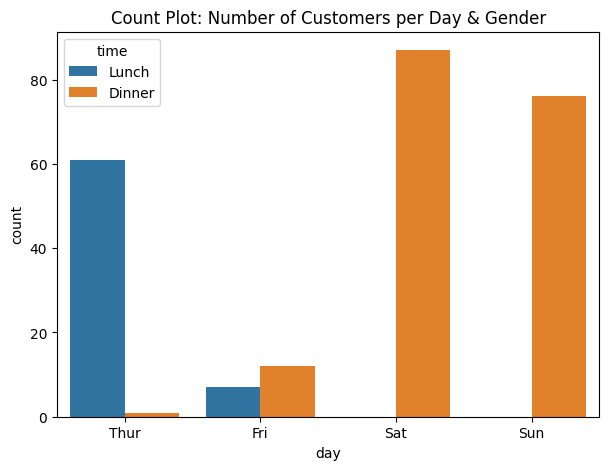

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="day", hue="time")
plt.title("Count Plot: Number of Customers per Day & Gender")
plt.show()

## Making **box plot** using `seaborn` library

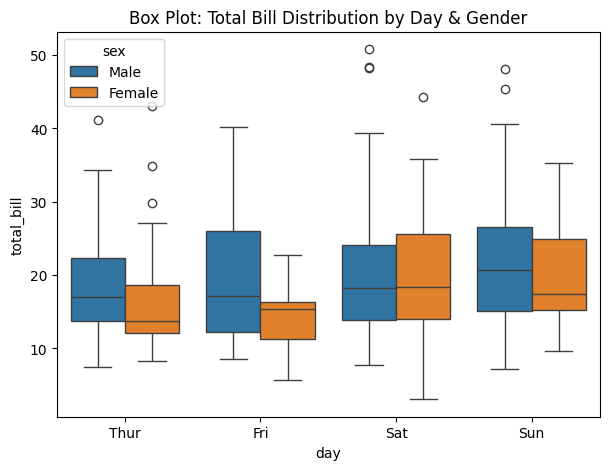

In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="day", y="total_bill", hue="sex")
plt.title("Box Plot: Total Bill Distribution by Day & Gender")
plt.show()

## Making **swarm plot** using `seaborn` library

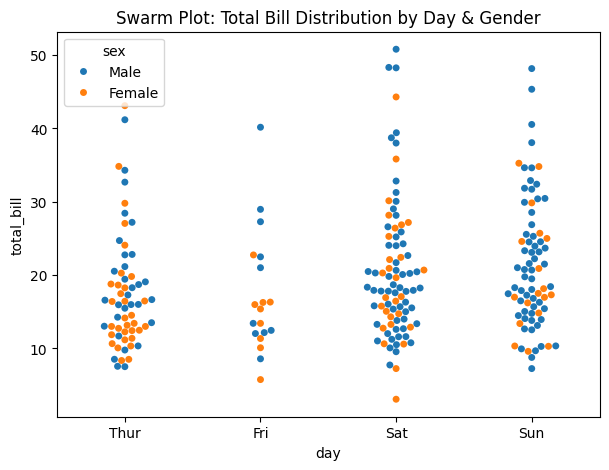

In [22]:
plt.figure(figsize=(7,5))
sns.swarmplot(data=df, x="day", y="total_bill", hue="sex")
plt.title("Swarm Plot: Total Bill Distribution by Day & Gender")
plt.show()

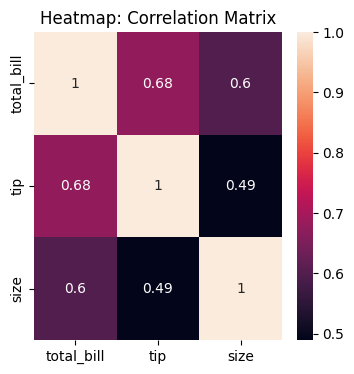

In [23]:
plt.figure(figsize=(4,4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title("Heatmap: Correlation Matrix")
plt.show()

## Making **pair plot** using `seaborn` library

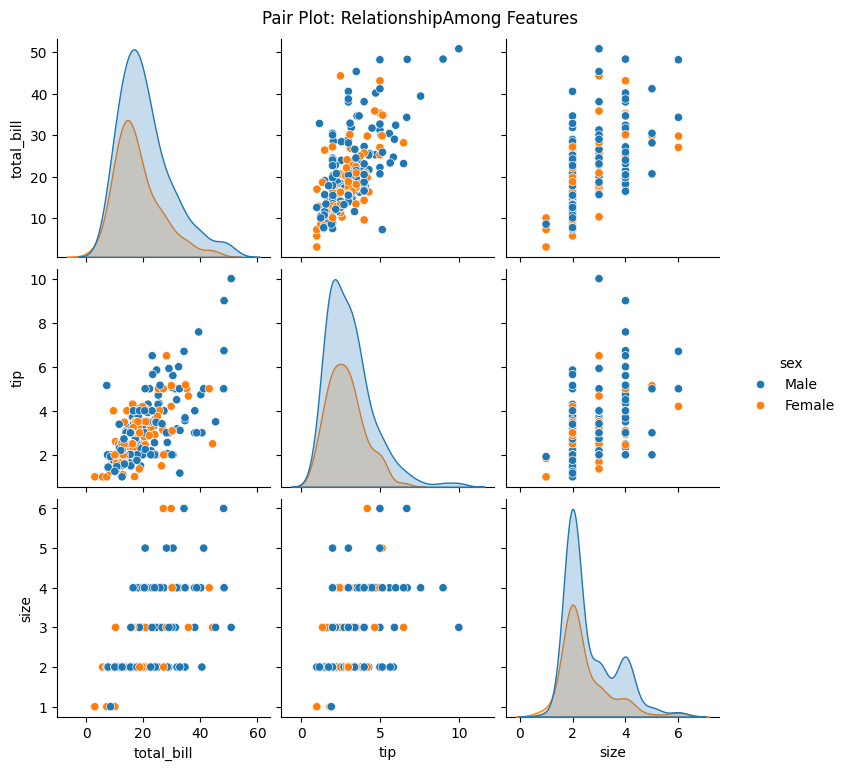

In [24]:
sns.pairplot(df, hue="sex")
plt.suptitle("Pair Plot: RelationshipAmong Features", y=1.02)
plt.show()